# Question_9_Solution:

for 9 question i didnot upload data set it exceeds size please understand

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests

In [23]:
# Loading Data from given link in question:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [24]:
df.shape

(130443, 17)

In [25]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [8]:
# Dropping Uncessary Columns:
df.drop(columns=['Legislative District', 'Vehicle Location', '2020 Census Tract', 'Electric Utility', 'VIN (1-10)'], inplace=True)

In [9]:
df.isnull().sum()

County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
DOL Vehicle ID                                         0
dtype: int64

In [10]:
df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
dtype: int64

In [12]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID'],
      dtype='object')

**Insights to be drawn -**

- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
- Get all TESLA cars with the model year, and model type made in Bothell City.
- Get all the cars that have an electric range of more than 100, and were made after 2015
- Draw plots to show the distribution between city and electric vehicle type

# 1. Get all the cars and their types that do not qualify for clean alternative fuel vehicle:

In [13]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [14]:
filtered_df = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isin(['Not eligible due to low battery range', 'Eligibility unknown as battery range has not been researched'])]

In [15]:
filtered_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [16]:
# Cars and their types that do not qualify for clean alternative fuel vehicle
ans_1 = filtered_df[['Model', 'Electric Vehicle Type']]
ans_1

,Model,Electric Vehicle Type
6,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
11,MODEL Y,Battery Electric Vehicle (BEV)
14,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...
130437,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130438,MODEL Y,Battery Electric Vehicle (BEV)
130439,LEAF,Battery Electric Vehicle (BEV)
130440,MODEL Y,Battery Electric Vehicle (BEV)


# 2. Get all TESLA cars with the model year, and model type made in Bothell City.

In [17]:
#df['City'].unique()

In [18]:
# All TESLA cars with the model year, and model type made in Bothell City
ans_2 = df[(df['City'] == 'Bothell') & (df['Make'] == 'TESLA')][['Make','Model', 'Model Year', 'Electric Vehicle Type', 'City']]
ans_2

,Make,Model,Model Year,Electric Vehicle Type,City
39,TESLA,MODEL 3,2020,Battery Electric Vehicle (BEV),Bothell
217,TESLA,MODEL 3,2022,Battery Electric Vehicle (BEV),Bothell
218,TESLA,MODEL Y,2022,Battery Electric Vehicle (BEV),Bothell
222,TESLA,MODEL 3,2018,Battery Electric Vehicle (BEV),Bothell
292,TESLA,MODEL X,2017,Battery Electric Vehicle (BEV),Bothell
...,...,...,...,...,...
129778,TESLA,MODEL 3,2019,Battery Electric Vehicle (BEV),Bothell
129954,TESLA,MODEL 3,2021,Battery Electric Vehicle (BEV),Bothell
129976,TESLA,MODEL S,2014,Battery Electric Vehicle (BEV),Bothell
130295,TESLA,MODEL 3,2022,Battery Electric Vehicle (BEV),Bothell


# 3. Get all the cars that have an electric range of more than 100, and were made after 2015

In [19]:
ans_3 = df[(df['Model Year'] > 2015) & (df['Electric Range'] > 100)][['Make','Model','Electric Range']]
ans_3

,Make,Model,Electric Range
0,TESLA,MODEL X,238
2,TESLA,MODEL 3,220
4,TESLA,MODEL S,210
12,TESLA,MODEL 3,308
13,TESLA,MODEL 3,322
...,...,...,...
130417,TESLA,MODEL Y,291
130428,NISSAN,LEAF,151
130432,TESLA,MODEL Y,291
130436,TESLA,MODEL 3,215


# 4. Draw plots to show the distribution between city and electric vehicle type

In [20]:
# Count the number of occurrences of each combination of city and electric vehicle type
count_df = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
count_df.head()

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
0,3.0,NaN
Aberdeen,73.0,42.0
Acme,3.0,4.0
Addy,1.0,1.0
Aiea,NaN,1.0


<Figure size 720x23652 with 0 Axes>

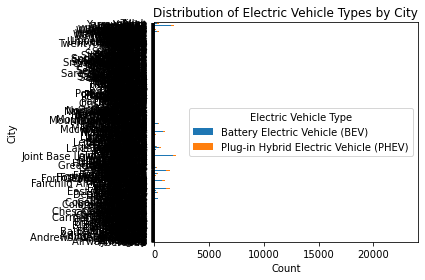

In [21]:
# Plot a stacked area plot
plt.figure(figsize=(10, count_df.shape[0]*0.5)) 
count_df.plot.barh(stacked=True)
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()  # Adjusts the spacing between subplots to prevent labels from overlapping
plt.show()